### *Q: When is the season and off season in each city? Compare between how and why the price varies in each city?*

<font size ='3'>*First, let's read in the data and necessary libraries*<font/>

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mypy import print_side_by_side
from mypy import display_side_by_side

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
b_cal = pd.read_csv('boston_calendar.csv')
s_cal = pd.read_csv('seatle_calendar.csv')

b_cal_1 = pd.read_csv('b_cal_1.csv', index_col =0 )
s_cal_1 = pd.read_csv('s_cal_1.csv', index_col =0 )

b_list_d = pd.read_csv('b_list_d.csv', index_col = 0)
s_list_d = pd.read_csv('s_list_d.csv', index_col = 0)

b_rev_score = pd.read_csv('b_rev_score.csv', index_col = 0)
s_rev_score = pd.read_csv('s_rev_score.csv', index_col = 0)

 _______________________________________________________________________________________________________________________

### Task 2: Data Understanding 

<font size ='3'>*Let's take a look at the descriptive statistics of **`price`**.*<font/>

In [170]:
#print_side_by_side('Boston: ', 'Seatle')
display_side_by_side(b_cal_1['price'].describe().reset_index().rename(columns = {'index':'statistic'}).iloc[1:,:],
                     s_cal_1['price'].describe().reset_index().rename(columns = {'index':'statistic'}).iloc[1:,:],
                     titles = ['price in Boston','price in Seatle'])

,statistic,price
1,mean,198.436227
2,std,180.153959
3,min,11.000000
4,25%,85.000000
5,50%,150.000000
6,75%,255.000000
7,max,7163.000000
,statistic,price
1,mean,148.816924
2,std,137.655883


><font size ='3'>**Looks like the average price and median price in Boston are significantly higher than in Seatle**<font/>
 <br><br>

<font size ='3'>*Let's start with plotting the no. of available lisings vs average price to check the variation - on a higher resolution - by days of the week*<font/>

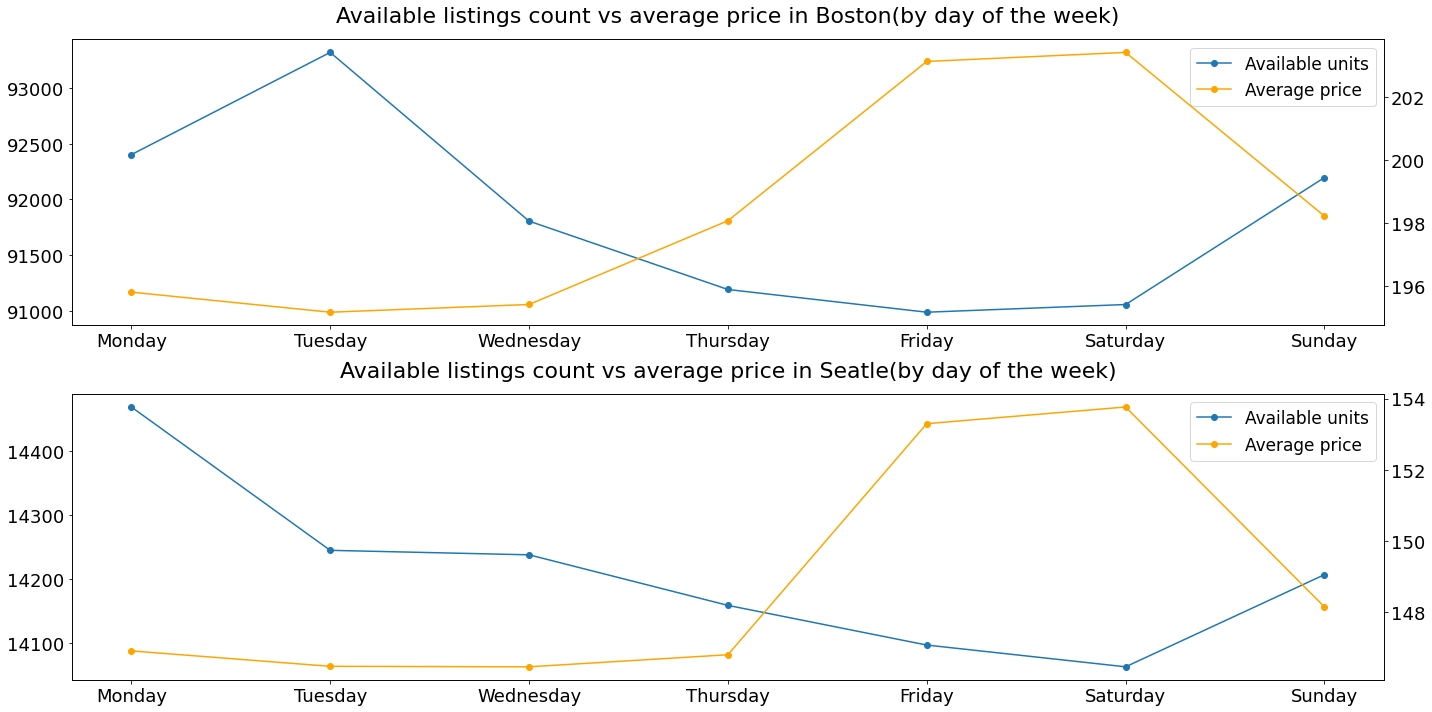

In [235]:
pd.options.mode.chained_assignment = None 
b_dow = b_cal_1[b_cal_1['available']==1].groupby(['dow'])['available'].count().reset_index().rename(columns ={'available': 'available_units'}).reindex([1,5,6,4,0,2,3]).reset_index(drop = True)
s_dow = s_cal_1[s_cal_1['available']==1].groupby(['dow'])['available'].count().reset_index().rename(columns ={'available': 'available_units'}).reindex([1,5,6,4,0,2,3]).reset_index(drop = True)

b_dow_price = b_cal_1[b_cal_1['available']==1].groupby(['dow'])['price'].mean().reset_index().rename(columns ={'available': 'average_price'}).reindex([1,5,6,4,0,2,3]).reset_index(drop = True)
s_dow_price = s_cal_1[s_cal_1['available']==1].groupby(['dow'])['price'].mean().reset_index().rename(columns ={'available': 'average_price'}).reindex([1,5,6,4,0,2,3]).reset_index(drop = True)

plt.figure(figsize=(20,10))

ax = plt.subplot(2,1,1)
ax.set_title('Available listings count vs average price in Boston(by day of the week)',pad =17, fontdict = {'fontsize':22})
availibility, = ax.plot(b_dow.dow, b_dow.available_units, marker ='o');
ax2 = ax.twinx()
price, = ax2.plot(b_dow.dow, b_dow_price.price,color="orange", marker ='o')
loc, lab = plt.yticks()
plt.yticks(fontsize= 14)
ax.legend([availibility,price],['Available units','Average price'],loc = 'upper right',prop={'size': 17})

#plt.xticks(np.arange(0,7,1), list(b_cal_day['day'].unique()))
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

ax =plt.subplot(2,1,2)
ax.set_title('Available listings count vs average price in Seatle(by day of the week)',pad =17, fontdict = {'fontsize':22})
ax.plot(s_dow.dow, s_dow.available_units, marker ='o');
ax2 = ax.twinx()
ax2.plot(s_dow.dow, s_dow_price.price,color="orange", marker ='o');
loc, lab = plt.yticks()
plt.yticks(fontsize= 14)
ax.legend([availibility,price],['Available units','Average price'],loc = 'upper right',prop={'size': 17})

# plt.xticks(np.arange(0,364,31), list(s_cal_date['n_month'].unique()))
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()

<font size ='3'>**Let's unpack the main points we take away from the two plots:**<font/><br>
>* <font size ='3'>**When a unit is not available on airbnb's website, it's either because it's no longer available for rent or because it's already occupied by a guest, but since the available units count by day and their price have a clear inverse relationship it suggests that the plot is mostly showing the latter showcasing a clear supply and demand pattern.**<font/> 
<br><br>
>* <font size ='3'>**It's clear that there is a surge in price around Fridays and Saturdays in both cities which indicates that it would be slightly more profitable to increase listings' prices - by around 10$- if they are to be rented in or starting the weekends.**<font/>
<br><br>
>* <font size ='3'>**For Boston, availability is at its highest on Tuesday, which means rentals are at their lowest then and that may indicate that  guests tend to leave from Sunday to Tuesdayn then rentals increase gradually through the week from Wednesday until Saturday and the cycle continues. Notice that these trends occur within variation of 2000 listings out of 90,000+ listings .**<font/>
<br><br>
>* <font size ='3'>**As for Seatle, it follows a similar pattern but people leave on Sundays and Mondays -only 2 days not 3.**<font/>
<br><br>
>* <font size ='3'>**These differences could be due to the massive difference in their touristic natures, as Boston's reveneus from tourism is significantly higher (around 3 times according to [this](https://www.seattletimes.com/opinion/editorials/introduce-visitors-to-a-broad-array-of-seattles-gems/) and [this](https://www.visitma.com/media-industry-portal/stats-reports/)) or because Boston is on average more expensive so people tend to stay for shorter periods, we have no conclusive evidence for either hypothesis**<font/>
<br><br>

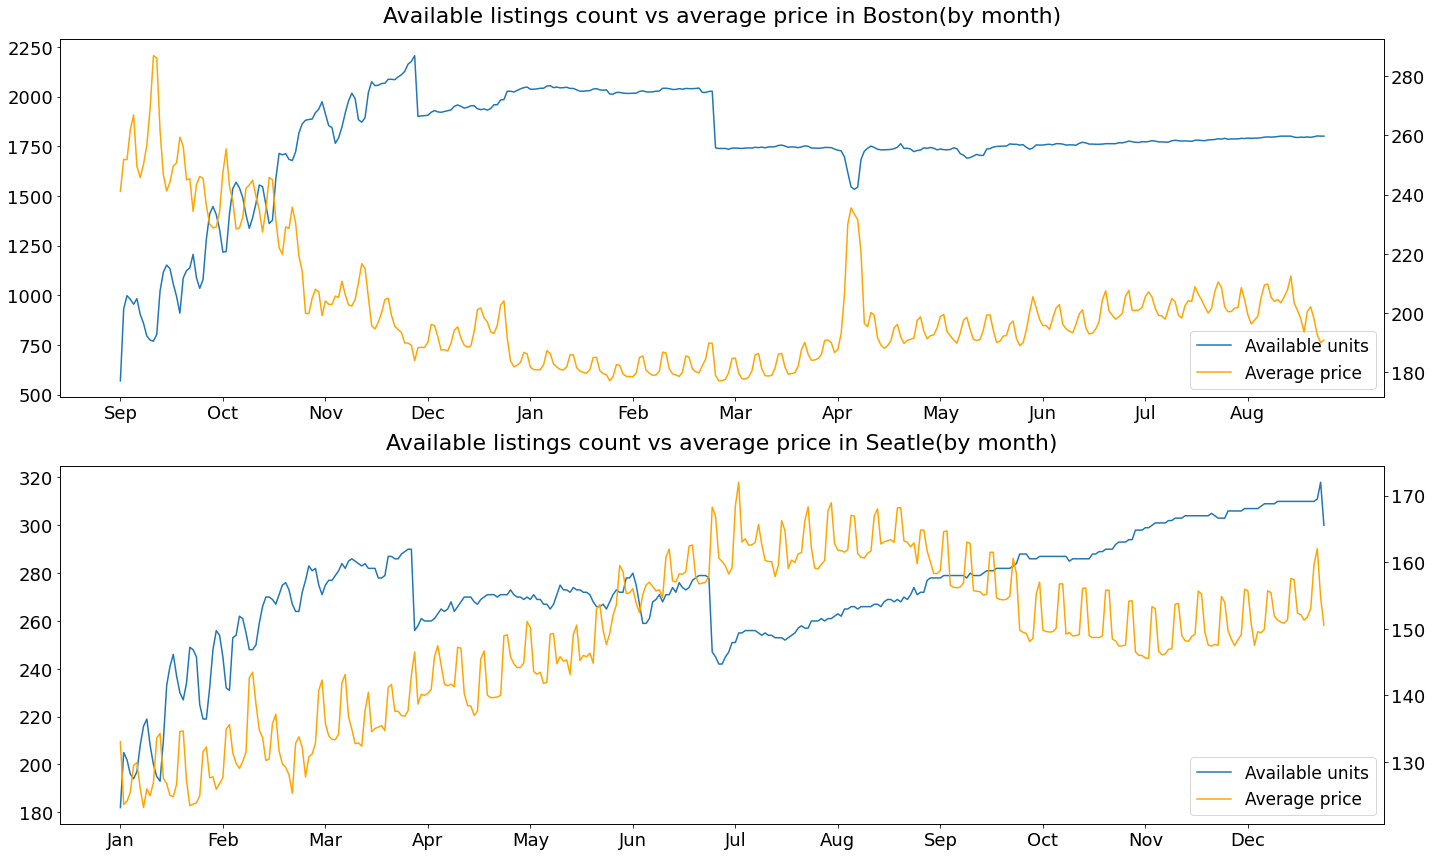

In [173]:
b_cal_date = b_cal_1[b_cal_1['available']==1].groupby(['date'])['available'].count().reset_index().rename(columns ={'available': 'available_units'})
b_cal_date['n_month']= pd.to_datetime(b_cal_date['date']).apply(lambda x : x.strftime("%b"))
s_cal_date = s_cal_1[s_cal_1['available']==1].groupby(['date'])['available'].count().reset_index().rename(columns ={'available': 'available_units'})
s_cal_date['n_month']= pd.to_datetime(s_cal_1['date']).apply(lambda x : x.strftime("%b"))
b_cal_price = b_cal_1[b_cal_1['available']==1].groupby(['date'])['price'].mean().reset_index()
s_cal_price = s_cal_1[s_cal_1['available']==1].groupby(['date'])['price'].mean().reset_index()

plt.figure(figsize=(20,12))

ax = plt.subplot(2,1,1)
ax.set_title('Available listings count vs average price in Boston(by month)',pad =17, fontdict = {'fontsize':22})
availibility, = ax.plot(b_cal_date.date, b_cal_date.available_units);
ax2 = ax.twinx()
price, = ax2.plot(b_cal_date.date, b_cal_price.price,color="orange")
loc, lab = plt.yticks()
plt.yticks(fontsize= 14)
ax.legend([availibility,price],['Available units','Average price'],loc = 'lower right',prop={'size': 17})
plt.xticks(np.arange(0,364,31), list(b_cal_date['n_month'].unique()))
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

ax =plt.subplot(2,1,2)
ax.set_title('Available listings count vs average price in Seatle(by month)',pad =17, fontdict = {'fontsize':22})
ax.plot(s_cal_date.date, s_cal_date.available_units);
ax2 = ax.twinx()
ax2.plot(s_cal_date.date, s_cal_price.price,color="orange");
loc, lab = plt.yticks()
plt.yticks(fontsize= 14)
ax.legend([availibility,price],['Available units','Average price'],loc = 'lower right',prop={'size': 17})
plt.xticks(np.arange(0,364,31), list(s_cal_date['n_month'].unique()))
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()

<font size ='3'>**The two plots are packed with infomration, yet, making comparisons between the two cities won't be as straight forward as expected because the ranges of the x-axes are different.**<font/>

><font size ='3'>**Making comparisons between the two cities won't be straight forward as the ranges of the x-axes are different.**
**There is**    


 <font/>
 <br>